In [10]:
!pip install keras
!pip install tensorflow
!pip install pandas
!pip install matplotlib
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 571.7 kB/s eta 0:00:0000:0100:10
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 596.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 788.8 kB/s eta 0:00:00:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 455.6 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 509.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 449.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 263.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 217.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 317.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 242.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("FB-stock-prices.csv")

In [3]:
df.shape

(251, 2)

In [4]:
print(df.dtypes)
df.head()

Date     object
Price     int64
dtype: object


,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


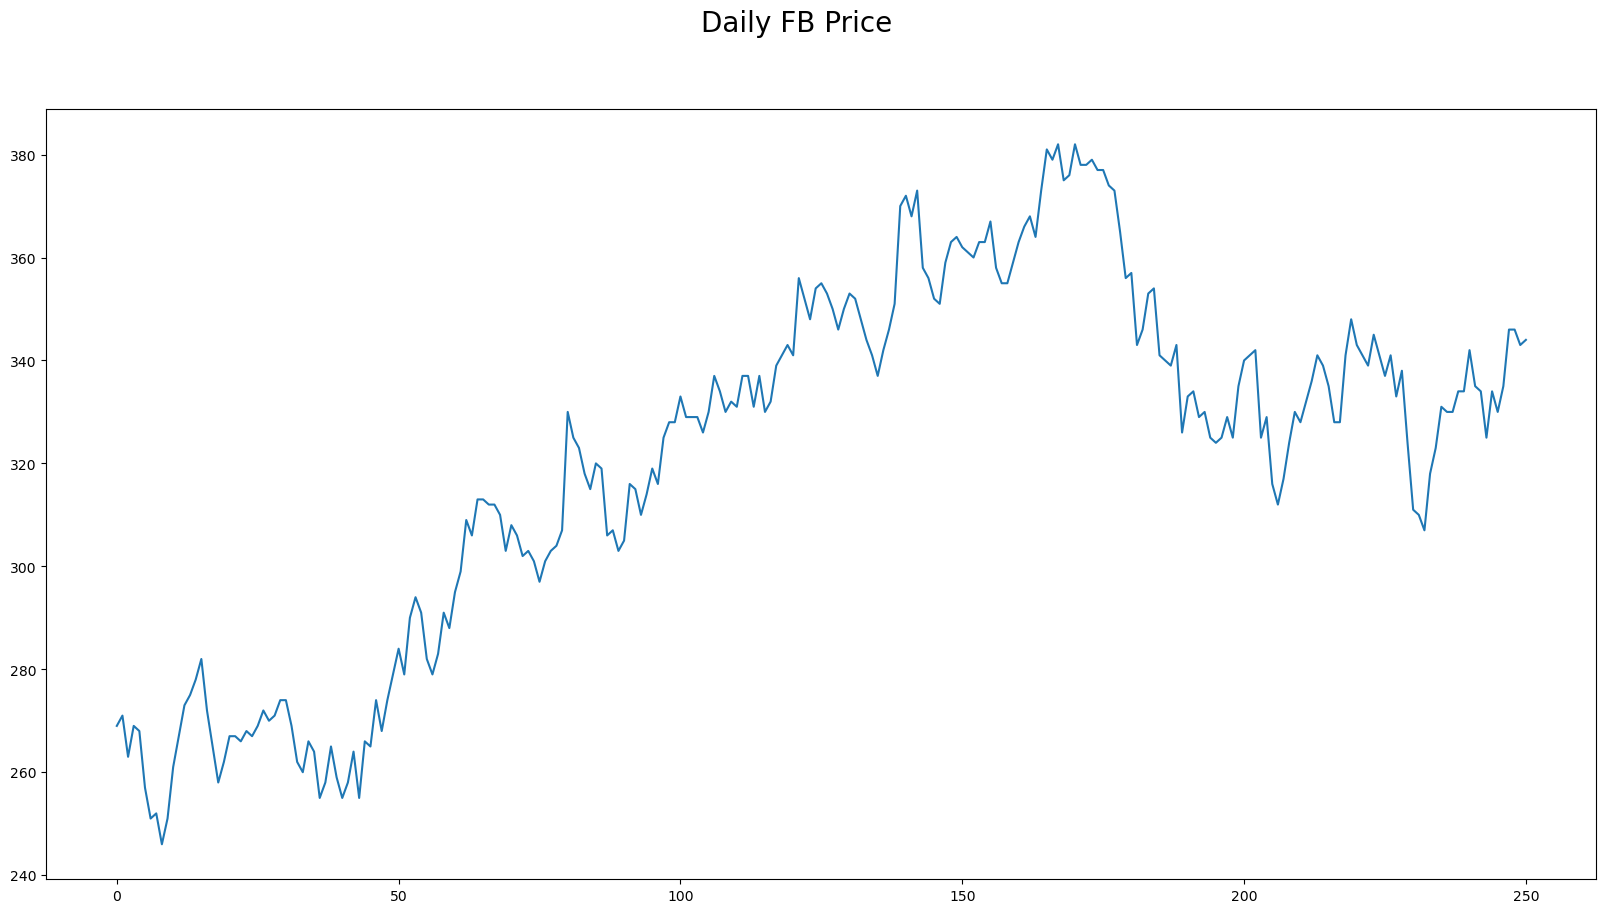

In [5]:
# Plot the data to visualize the stock price

plt.figure(figsize=(20,10)).suptitle("Daily FB Price", fontsize=20)
plt.plot(df["Price"])
plt.show()

# Split Data

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the Data
scaler = StandardScaler()
scaled_prices=scaler.fit_transform(df[["Price"]].values)

#Split data into Training and Test sets
total_size = len(scaled_prices)

#Test dataset size
test_size = 50

#Training dataset size
train_size = total_size - test_size
print(train_size, test_size)

training_prices = scaled_prices[0:train_size,:]
test_prices = scaled_prices[train_size:,:]

print(training_prices.shape, test_prices.shape)


201 50
(201, 1) (50, 1)


# Create Dataset for RNN

In [12]:
#Prepare RNN Dataset. 
#Each data point (X) is linked to the previous data points of size=lookback
#The predicted value (Y) is the next point

def create_rnn_dataset(data, lookback=1):
    
    data_x, data_y = [], []
    for i in range(len(data)- lookback -1):
            #All points from this point, looking backwards upto lookback
            a = data[i:(i+ lookback), 0]
            data_x.append(a)
            #The next point
            data_y.append(data[i + lookback, 0])
    return np.array(data_x), np.array(data_y)

#lookback for 25 previous days
lookback=25

#Create X and Y for training
train_req_x, train_req_y = create_rnn_dataset(training_prices,lookback)

#Reshape for use with RNN
train_req_x = np.reshape(train_req_x, 
                         (train_req_x.shape[0],1, train_req_x.shape[1]))

print("Shapes of X, Y: ",train_req_x.shape, train_req_y.shape)

Shapes of X, Y:  (175, 1, 25) (175,)


1.The create_rnn_dataset function takes two arguments: data (the input time-series data) and lookback (the number of previous data points to be used as input to predict the next data point).

2.Inside the function, two empty lists data_x and data_y are initialized to store the input sequences (X) and their corresponding target values (Y), respectively.

3.A loop iterates over the input data, starting from the first index up to len(data) - lookback - 1. For each index i, it extracts a sequence of length lookback from data (i.e., data[i:i+lookback]) and assigns it to variable a. This sequence of lookback data points becomes an input data point (X).

4.The next data point after the input sequence (i.e., data[i + lookback, 0]) is taken as the target value (Y).

5.The input data point (X) and its corresponding target value (Y) are appended to the data_x and data_y lists, respectively.

6.Once the loop is complete, the function returns two numpy arrays: data_x and data_y, which represent the prepared input and target datasets for training an RNN.

7.After the function definition, a value is assigned to the lookback variable (in this case, 25, indicating 25 previous days of data as input).

8.The function is then called with the training_prices dataset to create the training data train_req_x and train_req_y.

9.The shape of train_req_x is reshaped to be suitable for RNN input. The shape (number of data points, 1, lookback) means that each input data point is a 1D sequence of length lookback.

10.Finally, the shapes of train_req_x and train_req_y are printed to show the number of data points and the length of each input sequence.


In summary, the dataset is now prepared with 175 input sequences, each consisting of 25 previous data points, and 175 corresponding target values representing the next data point in the sequence.

# To build RNN Model

In [13]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
import tensorflow as tf

tf.random.set_seed(3)

#Create a Keras Model
price_model=Sequential()
#Add Simple RNN layer with 32 nodes
price_model.add(SimpleRNN(32, input_shape=(1,lookback)))
#Add a Dense layer at the end for output
price_model.add(Dense(1))

#Compile with Adam Optimizer. Optimize for minimum mean square error
price_model.compile(loss="mean_squared_error",
                 optimizer="adam",
                 metrics=["mse"])

#Print model summary
price_model.summary()

#Train the model
price_model.fit(train_req_x, train_req_y, 
             epochs=5, batch_size=1, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1856      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1889 (7.38 KB)
Trainable params: 1889 (7.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
175/175 [==============================] - 0s 418us/step - loss: 0.1434 - mse: 0.1434
Epoch 2/5
175/175 [==============================] - 0s 363us/step - loss: 0.0696 - mse: 0.0696
Epoch 3/5
175/175 [==============================] - 0s 356us/step - loss: 0.0583 - mse: 0.0583
Epoch 4/5
175/175 [==============================] - 0s 353us/step - loss: 0.0467 - mse: 0.0467
Epoch 5/5
175/175 [=================

# Test the Model

In [14]:
#Preprocess the test dataset, the same way training set is processed
test_req_x, test_req_y = create_rnn_dataset(test_prices,lookback)

print(test_req_x.shape, test_req_y.shape)

test_req_x = np.reshape(test_req_x, 
                         (test_req_x.shape[0],1, test_req_x.shape[1]))

#Evaluate the model
price_model.evaluate(test_req_x, test_req_y, verbose=1)

#Predict on the test dataset
predict_on_test = price_model.predict(test_req_x)

#Inverse the scaling to view results
predict_on_test = scaler.inverse_transform(predict_on_test)

(24, 25) (24,)
1/1 [==============================] - 0s 56ms/step


# Visualize the Results

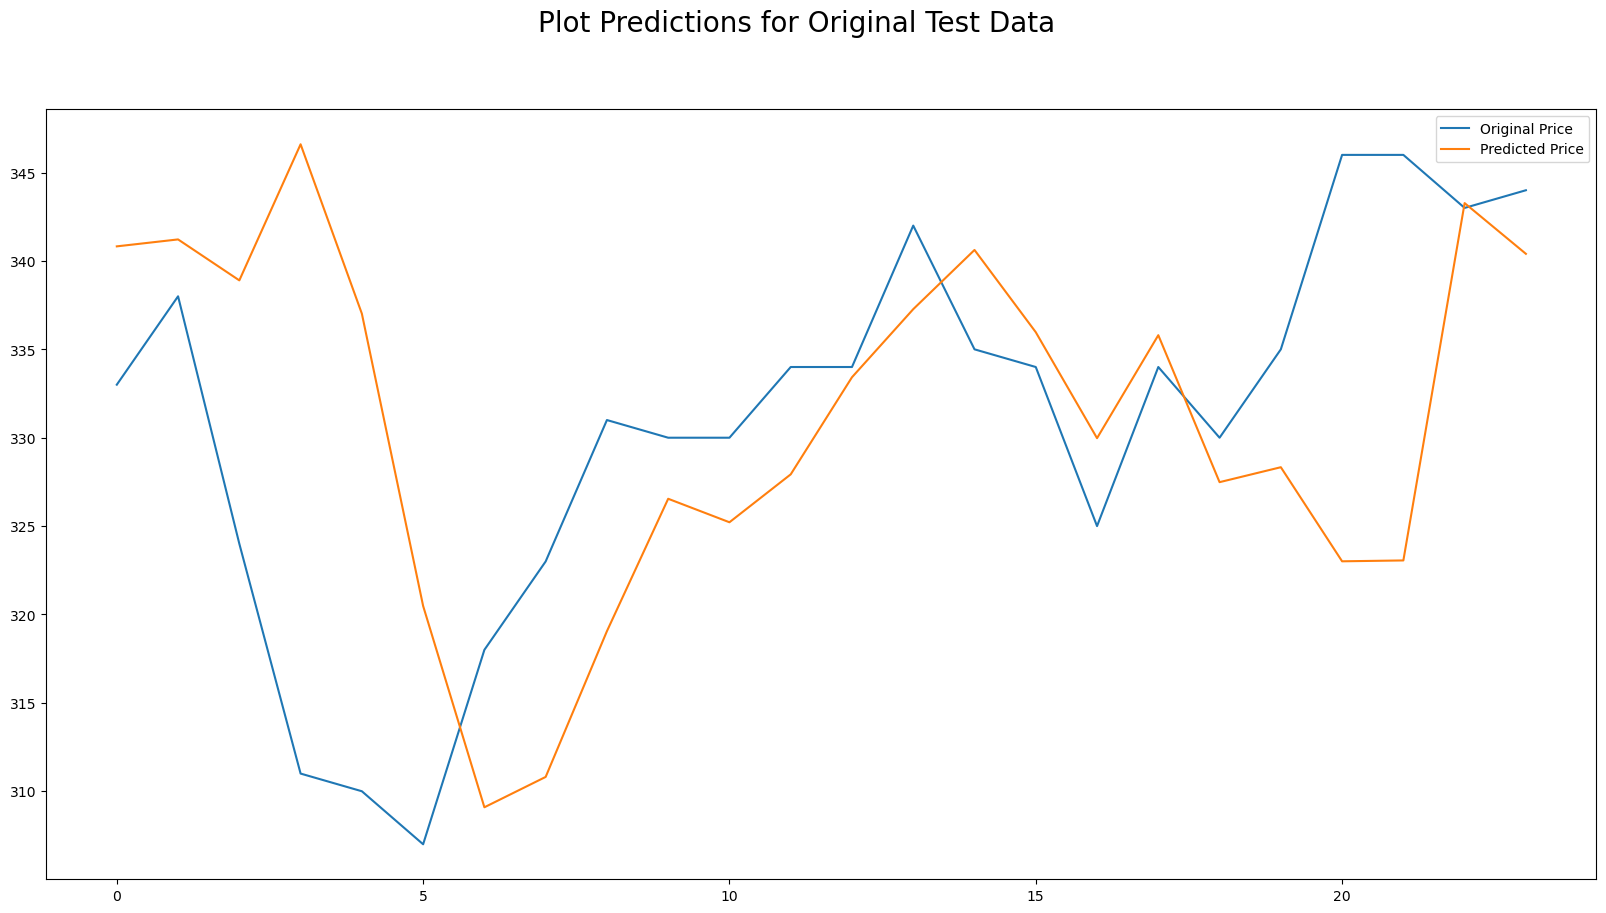

In [16]:
#Extract original test values that map to the same dates on the predicted test values
orig_test_values = df[["Price"]].loc[total_size-len(predict_on_test):]
orig_test_values.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20,10)).suptitle("Plot Predictions for Original Test Data", fontsize=20)
plt.plot(orig_test_values, label="Original Price")
plt.plot(predict_on_test, label="Predicted Price")
plt.legend()
plt.show()